In [1]:
# install required packages
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install numpy 


In [2]:
# import functions
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib notebook
plt.rcParams['figure.figsize'] = [20, 20]

from helpers import load_csv

In [3]:
# load data in numpy structured array
data = load_csv("dataset/trainset.csv")

In [4]:
# convert to pandas dataframe for vis
df =pd.DataFrame(data).set_index('Id')

In [5]:
# show df
df.head()

,Prediction,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
Id,,,,,,,,,,,,,,,,,,,,,
192847,0,-999.000,90.100,44.395,1.774,-999.000,-999.000,-999.000,1.377,1.774,...,-2.237,93.023,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.00,0.000
254329,0,28.478,52.063,21.773,54.510,-999.000,-999.000,-999.000,0.681,4.461,...,-3.022,138.790,1,50.076,1.173,2.079,-999.000,-999.000,-999.00,50.076
315049,0,74.538,119.834,66.795,44.244,0.658,28.226,-0.094,1.686,26.519,...,1.335,250.953,2,40.099,0.209,0.830,31.023,-0.449,0.57,71.123
190326,1,132.353,21.708,82.885,46.428,-999.000,-999.000,-999.000,2.634,12.341,...,-2.588,173.658,1,38.996,-0.825,1.559,-999.000,-999.000,-999.00,38.996
182910,1,119.640,21.306,84.493,108.251,-999.000,-999.000,-999.000,1.746,3.279,...,3.110,262.518,1,105.587,1.974,-0.436,-999.000,-999.000,-999.00,105.587


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 225000 entries, 192847 to 141824
Data columns (total 31 columns):
Prediction                     225000 non-null int32
DER_mass_MMC                   225000 non-null float64
DER_mass_transverse_met_lep    225000 non-null float64
DER_mass_vis                   225000 non-null float64
DER_pt_h                       225000 non-null float64
DER_deltaeta_jet_jet           225000 non-null float64
DER_mass_jet_jet               225000 non-null float64
DER_prodeta_jet_jet            225000 non-null float64
DER_deltar_tau_lep             225000 non-null float64
DER_pt_tot                     225000 non-null float64
DER_sum_pt                     225000 non-null float64
DER_pt_ratio_lep_tau           225000 non-null float64
DER_met_phi_centrality         225000 non-null float64
DER_lep_eta_centrality         225000 non-null float64
PRI_tau_pt                     225000 non-null float64
PRI_tau_eta                    225000 non-null float64
PRI_ta

In [ ]:
df.hist(bins=50, figsize=(20,20))
#note how the -999.0 values correspond to "null"
# some features are quite useless on first sight
#also lots of fat-tail distributions 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000015FB7FAEB08>,
      dtype=object)

In [8]:
df['Prediction'].value_counts()

0    147916
1     77084
Name: Prediction, dtype: int64

## Boxplot of all features

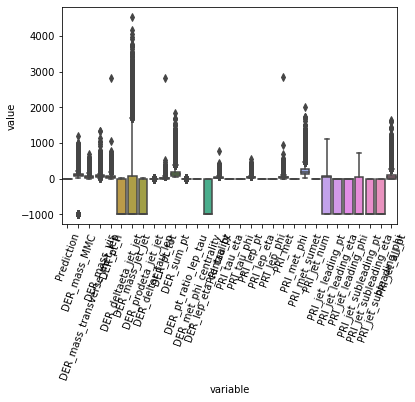

In [9]:
g = sns.boxplot(x="variable", y="value", data=pd.melt(df))
g.set_xticklabels(g.get_xticklabels(),rotation=70)

plt.show()
#plt.savefig("EDA/boxplot.png")

## Histograms by prediction value

<IPython.core.display.Javascript object>


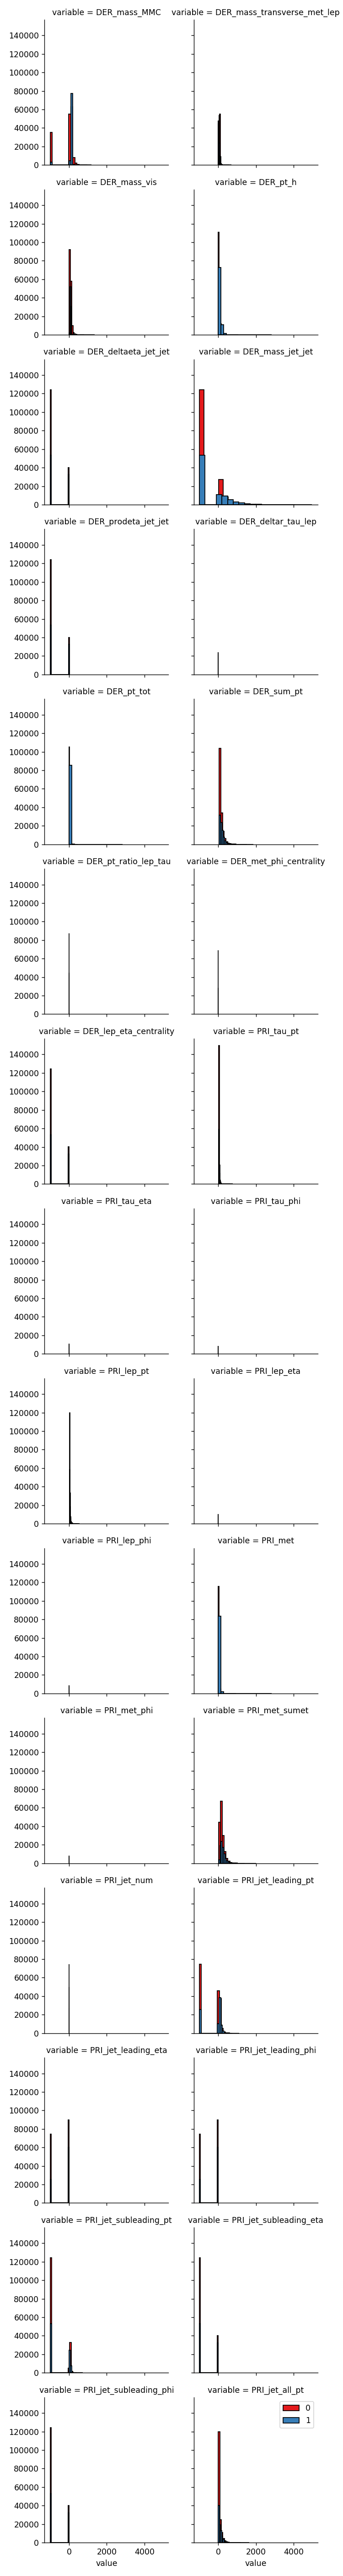

In [43]:
df2 = pd.melt(df, id_vars='Prediction')

bins=np.linspace(df2.value.min(), df2.value.max(), 100)
g = sns.FacetGrid(df2, col="variable", hue="Prediction", palette="Set1", col_wrap=2)
g.map(plt.hist, 'value', bins=20, ec="k")

g.axes[-1].legend()
plt.show()

## Correlation Heatmap

<IPython.core.display.Javascript object>


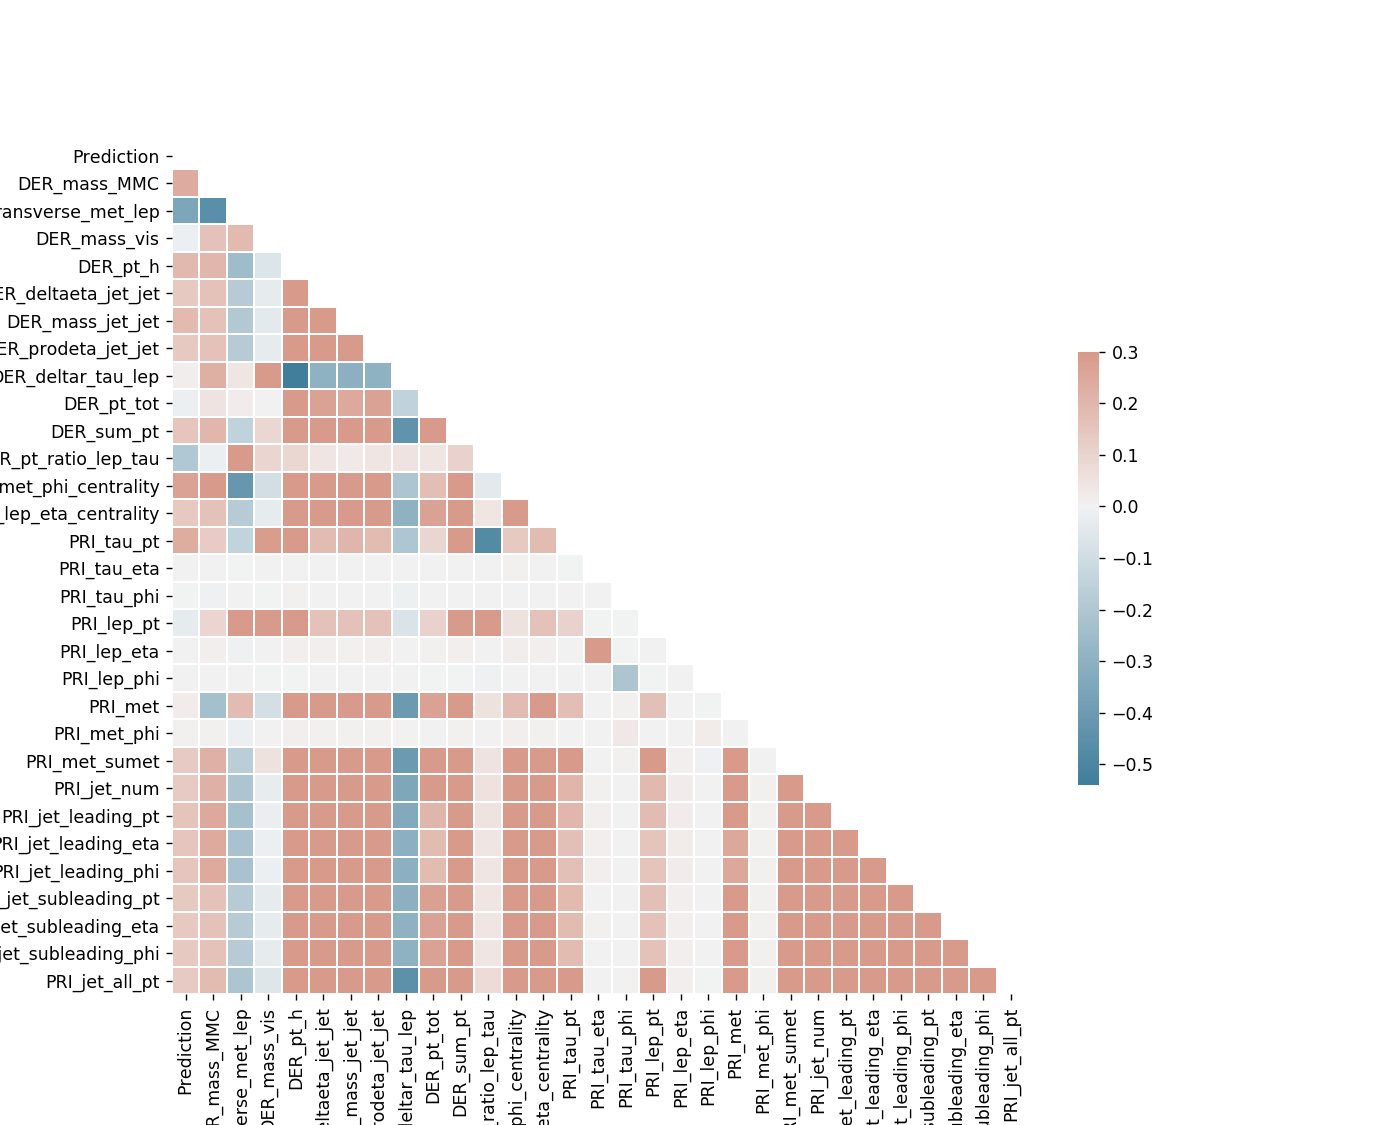

In [27]:

corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
#plt.savefig("EDA/heatmap.png")